# BASIC VISUALIZATION TOOLS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## DATAFRAME

**Read DataFrame**

In [2]:
## Paths of the file of data analysis
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx"
path = "C:\\Users\\USUARIO1\\Desktop\\MyPython\\Análisis de datos\\Visualization\\Canada.xlsx"

## Read the file either through url or direction file
df = pd.read_excel(url, sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


**Make changes to de data set**

In [3]:
## Remove columns that we don't consider important
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
## Rename columns whit a more specific name
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
## Use countries as name of columns
df.set_index('Country', inplace=True)
## Convert all the values of the columns to string
df.columns = list(map(str, df.columns))
## Add column whit the sum of migrations values
df['Total'] = df.sum(axis = 1)

df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## STYLE OF MATPLOTLIB

In [4]:
mpl.style.use('ggplot')

## AREA PLOT 

**Area Plot whitout stacked(SIN APILAR)**

In [5]:
years = list(map(str, range(1980, 2014)))

## Sort data using total inmigration criteria
df.sort_values(['Total'],  ascending = False, axis = 0, inplace = True)
## Create a dataframe whit the top 5 countries
df_top5 = df.head(5)
## Transpose the dataframe including only years
df_top5_t = df_top5[years].transpose()

df_top5_t.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


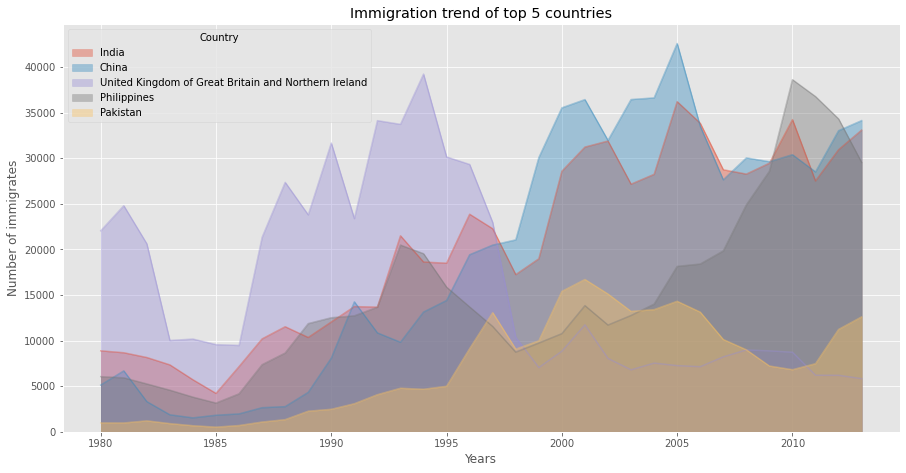

In [6]:
df_top5_t.plot(kind="area", alpha=0.4, stacked=False, figsize=(15, 7.5))
plt.title("Immigration trend of top 5 countries")
plt.xlabel("Years")
plt.ylabel("Number of immigrates")

plt.show()

**Area Plot stacked(APILADO)**

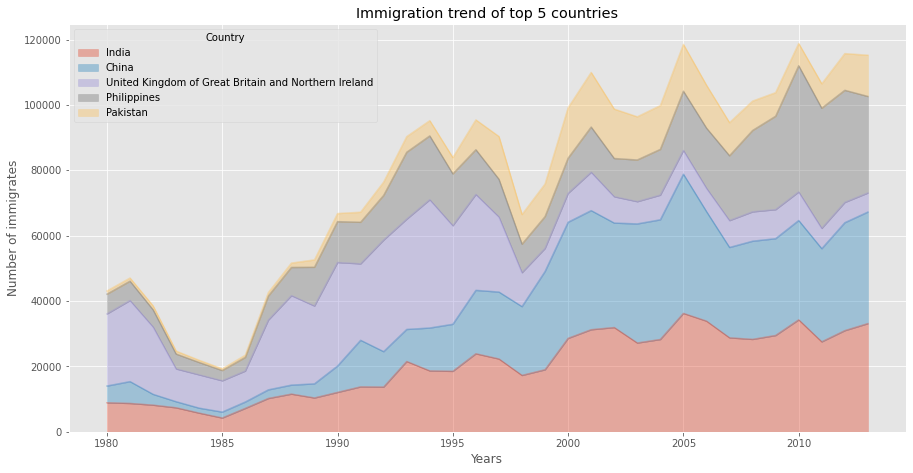

In [7]:
df_top5_t.plot(kind="area", alpha=0.4, figsize=(15, 7.5))
plt.title("Immigration trend of top 5 countries")
plt.xlabel("Years")
plt.ylabel("Number of immigrates")
plt.show()

## HISTOGRAM

In [8]:
print(df['2013'].head())

# np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64
[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


**Histogram whitout segmentation**

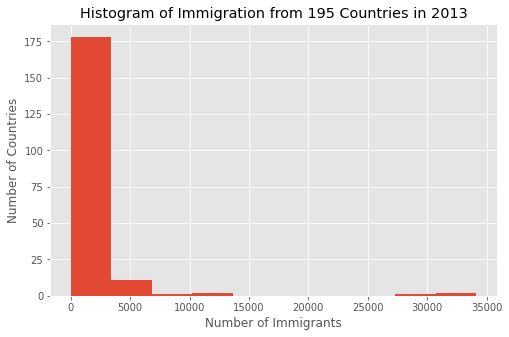

In [9]:
df['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

**Histogram whit segmentation**

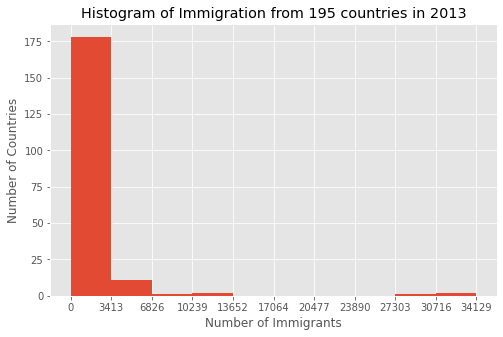

In [10]:
df['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

## BAR CHART

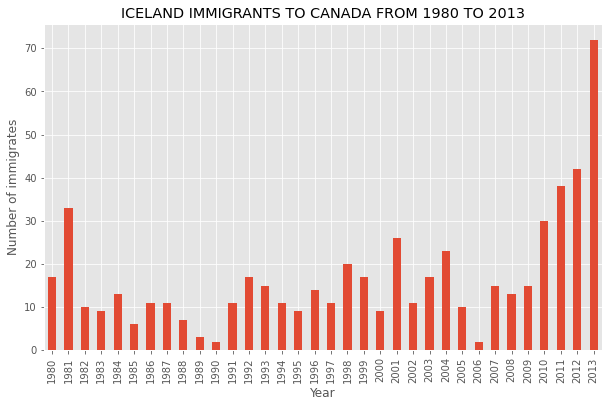

In [11]:
df_iceland = df.loc['Iceland', years]
    
df_iceland.plot(kind="bar", figsize=(10, 6))
plt.title("ICELAND IMMIGRANTS TO CANADA FROM 1980 TO 2013")
plt.xlabel("Year")
plt.ylabel("Number of immigrates")

plt.show()

**Bar Plot whit annotations**

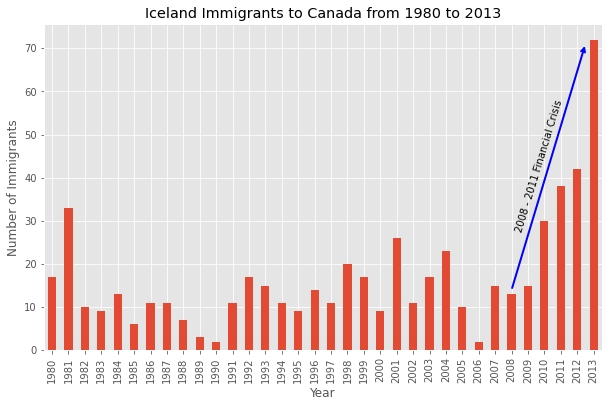

In [12]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Iceland Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32.5, 71),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 14),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28.2, 27),                    # start the text at at point (year 2008 , pop 30)
             rotation=73,                  # based on trial and error to match the arrow
             xycoords='data',                # will use the coordinate system of the object being annotated 
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

## INTERACTIVES PLOTS

In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

**Option 1**

In [14]:
##Parameters
countries = sorted(list(df.index))
styles = list(plt.style.available)

## Upload graph
def upload_graph(country, style):
    change_style_plot(style)
    change_country_and_plot(country)
#fed

## Change style of the graph
def change_style_plot(style):
    mpl.style.use(style)
#fed

## Change the country of the graph
def change_country_and_plot(country):
    df_country = df.loc[country, years]
    
    df_country.plot(kind="bar", figsize=(10, 6))
    plt.title(country.upper() + " IMMIGRANTS TO CANADA FROM 1980 TO 2013")
    plt.xlabel("Year")
    plt.ylabel("Number of immigrates")

    plt.show()
#fed

interactive(upload_graph, country = countries, style = styles)

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

**Option 2: better option**

In [15]:
##Parameters
countries = sorted(list(df.index))
styles = list(plt.style.available)

## Upload graph
def upload_graph(country, style):
    change_style_plot(style)
    change_country_and_plot(country)
#fed

## Change style of the graph
def change_style_plot(style):
    mpl.style.use(style)
#fed

## Change the country of the graph
def change_country_and_plot(country):
    df_country = df.loc[country, years]
    
    df_country.plot(kind="bar", figsize=(10, 6))
    plt.title(country.upper() + " IMMIGRANTS TO CANADA FROM 1980 TO 2013")
    plt.xlabel("Year")
    plt.ylabel("Number of immigrates")

    plt.show()
#fed

country = widgets.Dropdown(options=countries, value='Iceland', description='Country:', disabled=False)
style = widgets.Select(options=styles, value='ggplot', description='Style:', disabled=False)

widgets.interactive(upload_graph, country = country, style = style)

interactive(children=(Dropdown(description='Country:', index=78, options=('Afghanistan', 'Albania', 'Algeria',…